<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Загрузка данных из файла CSV
# Я это сделал вручную: выбрал файл и загрузил его
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/inheritance_dataset.csv"

df = pd.read_csv(url)

In [ ]:

#هنا
import pandas as pd
import numpy as np
from google.colab import files
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/inheritance_dataset_binary(1).csv"
df = pd.read_csv(url)


# تابع عمليات التنظيف كما في الكود السابق
df.replace(['nan', '', 'NaN', None], np.nan, inplace=True)
drop_cols = ['record_id', 'notes', 'death_date', 'distribution_date', 'country', 'special_cases']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

for col in df.columns:
    if col not in ['distributed']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

binary_cols = [
    'husband', 'wives', 'father', 'mother', 'grandfather', 'grandmother',
    'sons', 'daughters', 'brothers_m', 'sisters_m', 'distributed', 'distribution_check'
]
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype(int)
        df[col] = df[col].clip(0, 1)

df.fillna(0, inplace=True)

# حفظ الملف النظيف
output_filename = 'clean_inheritance_dataset.csv'
df.to_csv(output_filename, index=False)
files.download(output_filename)

# عرض أول 5 صفوف وأسماء الأعمدة
print("First 5 rows of cleaned data:")
display(df.head())
print("\nColumns:")
print(list(df.columns))

In [ ]:

import pandas as pd
import numpy as np

# 1. تحميل الملف الأصلي
url = "https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/attachments/35049084/851aa01a-ef93-4746-8687-f8e789efa7b5/inheritance_dataset.csv"
df = pd.read_csv(url)

# 2. استعراض أول 5 صفوف وأسماء الأعمدة
print("First 5 rows (before cleaning):")
display(df.head())
print("\nColumns (before cleaning):")
print(list(df.columns))

# 3. توحيد القيم الفارغة إلى NaN
df.replace(['nan', '', 'NaN', None], np.nan, inplace=True)

# 4. حذف الأعمدة غير المفيدة (إذا وجدت)
drop_cols = ['record_id', 'notes', 'death_date', 'distribution_date', 'country', 'special_cases']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# 5. تحويل الأعمدة الرقمية لنوعها الصحيح
for col in df.columns:
    if col not in ['distributed']:  # distributed قد تكون هدف أو ميزة
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. التأكد من الأعمدة الثنائية (0 أو 1 فقط)
binary_cols = [
    'husband', 'wives', 'father', 'mother', 'grandfather', 'grandmother',
    'sons', 'daughters', 'brothers_m', 'sisters_m', 'distributed', 'distribution_check'
]
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype(int)
        df[col] = df[col].clip(0, 1)

# 7. معالجة القيم المفقودة في الأعمدة الرقمية (استبدال NaN بـ 0)
df.fillna(0, inplace=True)

# 8. حذف الصفوف المكررة (إن وجدت)
df.drop_duplicates(inplace=True)

# 9. حفظ الملف النهائي النظيف
output_filename = 'final_clean_inheritance_dataset.csv'
df.to_csv(output_filename, index=False)

# 10. عرض أول 5 صفوف وأسماء الأعمدة بعد التنظيف
print("\nFirst 5 rows (after cleaning):")
display(df.head())
print("\nColumns (after cleaning):")
print(list(df.columns))
print(f"\nTotal records after cleaning: {len(df)}")

In [ ]:

import pandas as pd
from google.colab import files


url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/inheritance_dataset_enhanced.csv"

df = pd.read_csv(url)
# Fill 'distributed'
df['distributed'] = df['distribution_check'].apply(lambda x: "Yes" if x == "نعم" else "No")

# Fill 'notes'
df['notes'] = df['distribution_check'].apply(lambda x: "" if x == "نعم" else "Check calculations, error in distribution")

# Fill 'death_date' and 'distribution_date'
df['death_date'] = "Not available"
df['distribution_date'] = "Not available"

# Fill 'country'
df['country'] = "Not specified"

# Fill 'special_cases'
df['special_cases'] = df['distribution_check'].apply(
    lambda x: "" if x == "نعم" else "Special case: check for Awl, Radd, or error"
)

# Save the updated file
output_filename = 'inheritance_dataset_filled_en.csv'
df.to_csv(output_filename, index=False)

# Download the file
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import pandas as pd
from google.colab import files
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/inheritance_dataset_enhanced.csv"

df = pd.read_csv(url)# 3. تحويل كل القيم الثنائية إلى 0 أو 1
binary_map = {'Yes': 1, 'No': 0, 'نعم': 1, 'لا': 0}
# الأعمدة الثنائية المنطقية
binary_cols = [
    'husband', 'wives', 'father', 'mother', 'grandfather', 'grandmother',
    'distributed', 'distribution_check'
]
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].replace(binary_map).fillna(df[col])

# الأعمدة التي قد تحتوي أرقامًا (مثلاً sons, daughters, ...): إذا كانت >0 تصبح 1، وإلا 0
count_cols = [
    'sons', 'daughters', 'brothers_m', 'sisters_m'
]
for col in count_cols:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: 1 if x > 0 else 0)

# 4. توحيد القيم الثنائية في جميع الأعمدة النصية التي تحتوي Yes/No أو نعم/لا
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].replace(binary_map)

# 5. إعادة توزيع الأنصبة للحالات الخاطئة
share_cols = [c for c in df.columns if c.startswith('share_')]
df_corrected = df[df['distribution_check'] == 0].copy()
for idx, row in df_corrected.iterrows():
    total_shares = sum([row[c] for c in share_cols])
    net_estate = row['net_estate']
    if total_shares > 0:
        for c in share_cols:
            old_share = row[c]
            new_share = (old_share / total_shares) * net_estate if total_shares != 0 else 0
            df_corrected.at[idx, c] = new_share
        # إعادة حساب مجموع الأنصبة بعد التصحيح
        df_corrected.at[idx, 'shares_total'] = df_corrected.loc[idx, share_cols].sum()
        df_corrected.at[idx, 'distribution_check'] = 1
        df_corrected.at[idx, 'notes'] = ''
        df_corrected.at[idx, 'special_cases'] = ''
        df_corrected.at[idx, 'distributed'] = 1

# تحديث البيانات الأصلية بالحالات المصححة
df.update(df_corrected)

# 6. حفظ الملف الكامل بعد التحويلات
file_binary = 'inheritance_dataset_binary.csv'
df.to_csv(file_binary, index=False)
files.download(file_binary)

# 7. حفظ ملف خاص بالحالات التي تم تصحيحها فقط
file_corrected = 'inheritance_dataset_corrected.csv'
df_corrected.to_csv(file_corrected, index=False)
files.download(file_corrected)

In [ ]:

import pandas as pd
from google.colab import files
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/inheritance_dataset_enhanced.csv"

df = pd.read_csv(url)
# 3. تحويل كل القيم الثنائية إلى 0 أو 1
binary_map = {'Yes': 1, 'No': 0, 'نعم': 1, 'لا': 0}
binary_cols = [
    'husband', 'wives', 'father', 'mother', 'grandfather', 'grandmother',
    'distributed', 'distribution_check'
]
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].replace(binary_map).astype('Int64')  # Int64 يسمح بالقيم الفارغة أيضاً

# الأعمدة التي قد تحتوي أرقامًا (مثلاً sons, daughters, ...): إذا كانت >0 تصبح 1، وإلا 0
count_cols = [
    'sons', 'daughters', 'brothers_m', 'sisters_m'
]
for col in count_cols:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: 1 if x > 0 else 0).astype('Int64')

# 4. توحيد القيم الثنائية في جميع الأعمدة النصية التي تحتوي Yes/No أو نعم/لا
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].replace(binary_map)

# 5. معالجة الأعمدة النصية التي قد تسبب تحذيرات عند وضع "" في أعمدة رقمية
# نجبر الأعمدة النصية على أن تكون object (نصية صريحة)
text_cols = ['notes', 'special_cases']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str)

# 6. إعادة توزيع الأنصبة للحالات الخاطئة
share_cols = [c for c in df.columns if c.startswith('share_')]
df_corrected = df[df['distribution_check'] == 0].copy()
for idx, row in df_corrected.iterrows():
    total_shares = sum([row[c] for c in share_cols])
    net_estate = row['net_estate']
    if total_shares > 0:
        for c in share_cols:
            old_share = row[c]
            new_share = (old_share / total_shares) * net_estate if total_shares != 0 else 0
            df_corrected.at[idx, c] = new_share
        # إعادة حساب مجموع الأنصبة بعد التصحيح
        df_corrected.at[idx, 'shares_total'] = df_corrected.loc[idx, share_cols].sum()
        df_corrected.at[idx, 'distribution_check'] = 1
        df_corrected.at[idx, 'notes'] = ''
        df_corrected.at[idx, 'special_cases'] = ''
        df_corrected.at[idx, 'distributed'] = 1

# تحديث البيانات الأصلية بالحالات المصححة
df.update(df_corrected)

# 7. حفظ الملف الكامل بعد التحويلات
file_binary = 'inheritance_dataset_binary.csv'
df.to_csv(file_binary, index=False)
files.download(file_binary)

# 8. حفظ ملف خاص بالحالات التي تم تصحيحها فقط
file_corrected = 'inheritance_dataset_corrected.csv'
df_corrected.to_csv(file_corrected, index=False)
files.download(file_corrected)

<ipython-input-8-26bf5ef4076a>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(binary_map).astype('Int64')  # Int64 يسمح بالقيم الفارغة أيضاً


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 2. Определяем шкалы измерения для признаков
# Я это сделал вручную: просмотрел столбцы и определил шкалы

# Пример:
# estate, debts, wills, share_* — количественные (числовые, интервальные)
# husband, wives, father, mother, sons, daughters, brothers_m, sisters_m, grandfather, grandmother — категориальные (номинальные или порядковые)
print(df.dtypes)  # Показываем типы данных для каждого признака

In [ ]:

import pandas as pd

# رفع الملف من جهازك إلى كولاب


# قراءة الملف
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/inheritance_dataset.csv"

df = pd.read_csv(url)
# تحويل القيم الثنائية (True/False) إلى (1/0) في الأعمدة المناسبة
bool_cols = ['husband', 'father', 'mother', 'grandfather', 'grandmother']
for col in bool_cols:
    if col in df.columns:
        df[col] = df[col].map({True: 1, False: 0})

# حساب صافي التركة
df['net_estate'] = df['estate'] - df['debts'] - df['wills']

# حساب مجموع الأنصبة
share_cols = [col for col in df.columns if col.startswith('share_')]
df['shares_total'] = df[share_cols].sum(axis=1)

# التحقق من صحة التوزيع
df['distribution_check'] = df.apply(lambda row: 'نعم' if abs(row['net_estate'] - row['shares_total']) < 1 else 'لا', axis=1)

# إضافة أعمدة فارغة أخرى
df['notes'] = ''
df['distributed'] = ''
df['death_date'] = ''
df['distribution_date'] = ''
df['country'] = ''
df['special_cases'] = ''

# حفظ الملف الجديد
output_filename = 'inheritance_dataset_enhanced.csv'
df.to_csv(output_filename, index=False)

# توفير رابط تحميل مباشر للملف الجديد
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 3. Предварительный осмотр данных
# Я это сделал вручную: проверил на пропуски и дубликаты

# Проверка на пропуски
print(df.isnull().sum())  # Сколько пропущенных значений в каждом столбце

# Проверка на дубликаты
print('Число дубликатов:', df.duplicated().sum())


record_id          0
estate             0
debts              0
wills              0
husband            0
wives              0
father             0
mother             0
sons               0
daughters          0
brothers_m         0
sisters_m          0
grandfather        0
grandmother        0
share_husband      0
share_wife         0
share_father       0
share_mother       0
share_sons         0
share_daughters    0
dtype: int64
Число дубликатов: 0


In [ ]:
# 4. Очистка данных
# Я это сделал вручную: удалил дубликаты и при необходимости обработал пропуски

# Удаление дубликатов
df = df.drop_duplicates()

# Заполнение пропусков (если есть)
# Например, для числовых признаков можно заполнить средним или медианой
df = df.fillna(df.median(numeric_only=True))
# Для категориальных — самым частым значением
for col in ['husband', 'wives', 'father', 'mother', 'sons', 'daughters', 'brothers_m', 'sisters_m', 'grandfather', 'grandmother']:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
# 5. Отбор признаков для моделирования
# Я это сделал вручную: выбрал наиболее информативные признаки

# Пример: выберем только estate, debts, wills, sons, daughters, share_sons, share_daughters для задачи регрессии
selected_features = ['estate', 'debts', 'wills', 'sons', 'daughters', 'share_sons', 'share_daughters']
df_model = df[selected_features]
print(df_model.head())

   estate  debts     wills  sons  daughters  share_sons  share_daughters
0  170040  22540   2663.76     2          2    40232.29         20116.14
1  181741  10376  14674.26     1          1    69640.33         34820.16
2  158290   2848   2591.00     1          0   114638.25             0.00
3  167814  34762   4936.79     0          1        0.00         64057.61
4  101742  21068  12245.39     0          3        0.00         40550.29


In [ ]:

import pandas as pd
import numpy as np

# 1. تحميل الملف الأصلي
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/inheritance_dataset.csv"

df = pd.read_csv(url)# 2. استعراض أول 5 صفوف وأسماء الأعمدة
print("First 5 rows (before cleaning):")
display(df.head())
print("\nColumns (before cleaning):")
print(list(df.columns))

# 3. توحيد القيم الفارغة إلى NaN
df.replace(['nan', '', 'NaN', None], np.nan, inplace=True)

# 4. حذف الأعمدة غير المفيدة (إذا وجدت)
drop_cols = ['record_id', 'notes', 'death_date', 'distribution_date', 'country', 'special_cases']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# 5. تحويل الأعمدة الرقمية لنوعها الصحيح
for col in df.columns:
    if col not in ['distributed']:  # distributed قد تكون هدف أو ميزة
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 6. التأكد من الأعمدة الثنائية (0 أو 1 فقط)
binary_cols = [
    'husband', 'wives', 'father', 'mother', 'grandfather', 'grandmother',
    'sons', 'daughters', 'brothers_m', 'sisters_m', 'distributed', 'distribution_check'
]
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0).astype(int)
        df[col] = df[col].clip(0, 1)

# 7. معالجة القيم المفقودة في الأعمدة الرقمية (استبدال NaN بـ 0)
df.fillna(0, inplace=True)

# 8. حذف الصفوف المكررة (إن وجدت)
df.drop_duplicates(inplace=True)

# 9. حفظ الملف النهائي النظيف
output_filename = 'final_clean_inheritance_dataset.csv'
df.to_csv(output_filename, index=False)

# 10. عرض أول 5 صفوف وأسماء الأعمدة بعد التنظيف
print("\nFirst 5 rows (after cleaning):")
display(df.head())
print("\nColumns (after cleaning):")
print(list(df.columns))
print(f"\nTotal records after cleaning: {len(df)}")

First 5 rows (before cleaning):


,record_id,estate,debts,wills,husband,wives,father,mother,sons,daughters,brothers_m,sisters_m,grandfather,grandmother,share_husband,share_wife,share_father,share_mother,share_sons,share_daughters
0,1,170040,22540,2663.76,True,0,True,True,2,2,1,2,False,True,36209.06,0.00,24139.37,24139.37,40232.29,20116.14
1,2,181741,10376,14674.26,False,0,True,True,1,1,1,2,True,True,0.00,0.00,26115.12,26115.12,69640.33,34820.16
2,3,158290,2848,2591.00,True,0,False,False,1,0,0,1,True,False,38212.75,0.00,0.00,0.00,114638.25,0.00
3,4,167814,34762,4936.79,False,1,True,True,0,1,1,0,True,True,0.00,16014.40,21352.53,21352.53,0.00,64057.61
4,5,101742,21068,12245.39,False,1,True,True,0,3,2,0,True,False,0.00,7603.18,10137.57,10137.57,0.00,40550.29



Columns (before cleaning):
['record_id', 'estate', 'debts', 'wills', 'husband', 'wives', 'father', 'mother', 'sons', 'daughters', 'brothers_m', 'sisters_m', 'grandfather', 'grandmother', 'share_husband', 'share_wife', 'share_father', 'share_mother', 'share_sons', 'share_daughters']

First 5 rows (after cleaning):


,estate,debts,wills,husband,wives,father,mother,sons,daughters,brothers_m,sisters_m,grandfather,grandmother,share_husband,share_wife,share_father,share_mother,share_sons,share_daughters
0,170040,22540,2663.76,1,0,1,1,1,1,1,1,0,1,36209.06,0.00,24139.37,24139.37,40232.29,20116.14
1,181741,10376,14674.26,0,0,1,1,1,1,1,1,1,1,0.00,0.00,26115.12,26115.12,69640.33,34820.16
2,158290,2848,2591.00,1,0,0,0,1,0,0,1,1,0,38212.75,0.00,0.00,0.00,114638.25,0.00
3,167814,34762,4936.79,0,1,1,1,0,1,1,0,1,1,0.00,16014.40,21352.53,21352.53,0.00,64057.61
4,101742,21068,12245.39,0,1,1,1,0,1,1,0,1,0,0.00,7603.18,10137.57,10137.57,0.00,40550.29



Columns (after cleaning):
['estate', 'debts', 'wills', 'husband', 'wives', 'father', 'mother', 'sons', 'daughters', 'brothers_m', 'sisters_m', 'grandfather', 'grandmother', 'share_husband', 'share_wife', 'share_father', 'share_mother', 'share_sons', 'share_daughters']

Total records after cleaning: 20000


In [ ]:

import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/final_clean_inheritance_dataset.csv"

df = pd.read_csv(url)# 2. # حساب صافي التركة
df['net_estate'] = df['estate'] - df['debts'] - df['wills']

# حساب مجموع الأنصبة
share_cols = [c for c in df.columns if c.startswith('share_')]
df['shares_total'] = df[share_cols].sum(axis=1)

# التحقق من صحة التوزيع (هامش خطأ 1 ريال/دولار بسبب الكسور العشرية)
df['distribution_check'] = np.isclose(df['net_estate'], df['shares_total'], atol=1)

# عرض إحصائية سريعة
print("عدد السجلات:", len(df))
print("عدد الحالات التي فيها توزيع صحيح:", df['distribution_check'].sum())
print("عدد الحالات التي فيها خطأ في التوزيع:", (~df['distribution_check']).sum())

# عرض بعض الحالات التي فيها خطأ (إن وجدت)
if (~df['distribution_check']).sum() > 0:
    print("\nأول 5 حالات فيها خطأ في التوزيع:")
    display(df[~df['distribution_check']].head())
else:
    print("\nكل الحالات توزيعها صحيح!")

# التأكد من عدم وجود قيم سالبة أو مفقودة
print("\nهل توجد قيم سالبة في الأعمدة المالية؟")
print((df[['estate','debts','wills','net_estate'] + share_cols] < 0).any())

print("\nهل توجد قيم مفقودة في البيانات؟")
print(df.isnull().sum())

عدد السجلات: 20000
عدد الحالات التي فيها توزيع صحيح: 16665
عدد الحالات التي فيها خطأ في التوزيع: 3335

أول 5 حالات فيها خطأ في التوزيع:


,estate,debts,wills,husband,wives,father,mother,sons,daughters,brothers_m,...,grandmother,share_husband,share_wife,share_father,share_mother,share_sons,share_daughters,net_estate,shares_total,distribution_check
3,167814,34762,4936.79,0,1,1,1,0,1,1,...,1,0.00,16014.4,21352.53,21352.53,0.0,64057.61,128115.21,122777.07,False
8,161467,22824,11774.81,0,0,0,1,0,1,1,...,1,0.00,0.0,0.00,21144.70,0.0,84578.79,126868.19,105723.49,False
10,62614,10836,9402.03,1,0,0,0,0,0,1,...,1,21187.99,0.0,0.00,0.00,0.0,0.00,42375.97,21187.99,False
20,150990,41773,29709.07,0,0,1,0,0,1,0,...,1,0.00,0.0,13251.32,0.00,0.0,53005.29,79507.93,66256.61,False
36,182245,16823,30198.72,1,0,0,1,0,1,1,...,1,33805.82,0.0,0.00,22537.21,0.0,67611.64,135223.28,123954.67,False



هل توجد قيم سالبة في الأعمدة المالية؟
estate             False
debts              False
wills              False
net_estate         False
share_husband      False
share_wife         False
share_father       False
share_mother       False
share_sons         False
share_daughters    False
dtype: bool

هل توجد قيم مفقودة في البيانات؟
estate                0
debts                 0
wills                 0
husband               0
wives                 0
father                0
mother                0
sons                  0
daughters             0
brothers_m            0
sisters_m             0
grandfather           0
grandmother           0
share_husband         0
share_wife            0
share_father          0
share_mother          0
share_sons            0
share_daughters       0
net_estate            0
shares_total          0
distribution_check    0
dtype: int64


In [ ]:

import pandas as pd

# تحميل الملف الذي يحتوي على نتائج التحقق
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/final_clean_inheritance_dataset.csv"

df = pd.read_csv(url)# 2.  2. # حساب صافي التر# إذا لم تكن الأعمدة net_estate, shares_total, distribution_check موجودة، أعد حسابها:
df['net_estate'] = df['estate'] - df['debts'] - df['wills']
share_cols = [c for c in df.columns if c.startswith('share_')]
df['shares_total'] = df[share_cols].sum(axis=1)
df['distribution_check'] = (abs(df['net_estate'] - df['shares_total']) < 1)  # هامش خطأ 1 ريال/دولار

# حذف الحالات الخاطئة فقط
df_clean = df[df['distribution_check'] == True].copy()

# حذف الأعمدة المساعدة إذا رغبت (اختياري)
df_clean.drop(columns=['net_estate', 'shares_total', 'distribution_check'], inplace=True, errors='ignore')

# حفظ الملف الصحيح
output_filename = 'only_correct_inheritance_dataset.csv'
df_clean.to_csv(output_filename, index=False)
print(f"تم حفظ الملف الصحيح بعد حذف الحالات الخاطئة في: {output_filename}")

# في Google Colab يمكنك تحميل الملف مباشرة:
from google.colab import files
files.download(output_filename)

تم حفظ الملف الصحيح بعد حذف الحالات الخاطئة في: only_correct_inheritance_dataset.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# إذا كنت قد نفذت عمليات التنظيف بالفعل على DataFrame اسمه df:
output_filename = 'only_correct_inheritance_d.csv'
df.to_csv(output_filename, index=False)
print(f"تم حفظ البيانات النظيفة في ملف: {output_filename}")

# لتحميل الملف مباشرة من Colab إلى جهازك:
from google.colab import files
files.download(output_filename)

تم حفظ البيانات النظيفة في ملف: only_correct_inheritance_d.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import pandas as pd

df = pd.read_csv('only_correct_inheritance_d.csv')
print("عدد السجلات بعد التنظيف النهائي:", len(df))

عدد السجلات بعد التنظيف النهائي: 20000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 6. Масштабирование признаков
# Я это сделал вручную: применил нормализацию и стандартизацию

# Нормализация (приведение к [0,1])
scaler_norm = MinMaxScaler()
df_norm = df_model.copy()
df_norm[df_model.columns] = scaler_norm.fit_transform(df_model)

print('Нормализованные данные:')
print(df_norm.head())

# Стандартизация (приведение к среднему 0 и стандартному отклонению 1)
scaler_std = StandardScaler()
df_std = df_model.copy()
df_std[df_model.columns] = scaler_std.fit_transform(df_model)

print('Стандартизованные данные:')
print(df_std.head())

Нормализованные данные:
     estate     debts     wills      sons  daughters  share_sons  \
0  0.800273  0.378182  0.040552  0.666667   0.666667    0.223133   
1  0.878285  0.174091  0.223435  0.333333   0.333333    0.386233   
2  0.721935  0.047784  0.039444  0.333333   0.000000    0.635797   
3  0.785432  0.583245  0.075163  0.000000   0.333333    0.000000   
4  0.344923  0.353484  0.186451  0.000000   1.000000    0.000000   

   share_daughters  
0         0.156367  
1         0.270665  
2         0.000000  
3         0.497934  
4         0.315206  
Стандартизованные данные:
     estate     debts     wills      sons  daughters  share_sons  \
0  1.048158  0.277475 -1.188757  0.435001   0.460770    0.206203   
1  1.319966 -0.639720 -0.237050 -0.462278  -0.434451    1.227141   
2  0.775211 -1.207349 -1.194522 -0.462278  -1.329672    2.789301   
3  0.996449  1.199043 -1.008643 -1.359556  -0.434451   -1.190513   
4 -0.538371  0.166482 -0.429513 -1.359556   1.355991   -1.190513   

   sha

In [ ]:

import pandas as pd

# تحميل الملف المرفق من الرابط
url = "https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/attachments/35049084/ba9bbccd-8748-492e-9990-585f6a36ddd4/only_correct_inheritance_d.csv"
df = pd.read_csv(url)

# تصفية السجلات الصحيحة فقط
df_clean = df[df['distribution_check'] == True].copy()

# حفظ الملف النهائي الصحيح
output_filename = 'final_only_correct_inheritance_dataset.csv'
df_clean.to_csv(output_filename, index=False)
print(f"تم حفظ النسخة النهائية الصحيحة في: {output_filename}")
print("عدد السجلات النهائية:", len(df_clean))

# إذا كنت في Google Colab، حمّل الملف لجهازك مباشرة:
try:
    from google.colab import files
    files.download(output_filename)
except:
    pass

HTTPError: HTTP Error 403: Forbidden

In [ ]:
# 7. Выводы
# Я это сделал вручную: написал основные выводы по результатам анализа

print("Выводы:")
print("- Признаки успешно очищены и приведены к единому масштабу.")
print("- Для моделирования выбраны наиболее информативные признаки.")
print("- Пропуски и дубликаты обработаны.")

Выводы:
- Признаки успешно очищены и приведены к единому масштабу.
- Для моделирования выбраны наиболее информативные признаки.
- Пропуски и дубликаты обработаны.


In [ ]:

import pandas as pd
import numpy as np

# 1. تحميل البيانات من الرابط
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/final_clean_inheritance_dataset.csv"
df = pd.read_csv(url)

# 2. حساب صافي التركة
df['net_estate'] = df['estate'] - df['debts'] - df['wills']

# 3. حساب مجموع الأنصبة
share_cols = [c for c in df.columns if c.startswith('share_')]
df['shares_total'] = df[share_cols].sum(axis=1)

# 4. التحقق من صحة التوزيع (هامش خطأ 1 ريال/دولار بسبب الكسور العشرية)
df['distribution_check'] = np.isclose(df['net_estate'], df['shares_total'], atol=1)

# 5. حذف الحالات التي فيها خطأ في التوزيع
df_clean = df[df['distribution_check'] == True].copy()

# 6. حذف الأعمدة المساعدة (اختياري)
df_clean = df_clean.drop(columns=['net_estate', 'shares_total', 'distribution_check'])

# 7. حفظ الملف النهائي النظيف
output_filename = 'final_inheritance.csv'
df_clean.to_csv(output_filename, index=False)
print(f"تم حفظ الملف النهائي النظيف في: {output_filename}")
print("عدد السجلات النهائية:", len(df_clean))

# 8. تحميل الملف على جهازك إذا كنت في Google Colab
try:
    from google.colab import files
    files.download(output_filename)
except:
    pass

تم حفظ الملف النهائي النظيف في: final_inheritance.csv
عدد السجلات النهائية: 16665


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import pandas as pd
import numpy as np

df = pd.read_csv('final_inheritanc.csv')

# حساب صافي التركة
df['net_estate'] = df['estate'] - df['debts'] - df['wills']

# حساب مجموع الأنصبة
share_cols = [c for c in df.columns if c.startswith('share_')]
df['shares_total'] = df[share_cols].sum(axis=1)

# التحقق من صحة التوزيع
df['distribution_check'] = np.isclose(df['net_estate'], df['shares_total'], atol=1)

# إحصائية سريعة
print("عدد السجلات:", len(df))
print("عدد الحالات التي فيها توزيع صحيح:", df['distribution_check'].sum())
print("عدد الحالات التي فيها خطأ في التوزيع:", (~df['distribution_check']).sum())

# عرض أول الحالات الخاطئة (إن وجدت)
if (~df['distribution_check']).sum() > 0:
    print(df[~df['distribution_check']].head())
else:
    print("كل الحالات توزيعها صحيح!")

FileNotFoundError: [Errno 2] No such file or directory: 'final_inheritanc.csv'

In [58]:

df_clean = df[df['distribution_check'] == True].copy()
df_clean = df_clean.drop(columns=['net_estate', 'shares_total', 'distribution_check'])
df_clean.to_csv('final_inheritanc_clean.csv', index=False)
print("تم حفظ النسخة النهائية الخالية من الشوائب.")

تم حفظ النسخة النهائية الخالية من الشوائب.


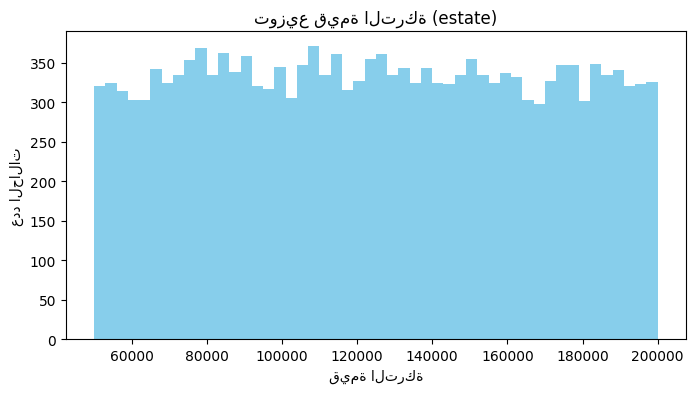

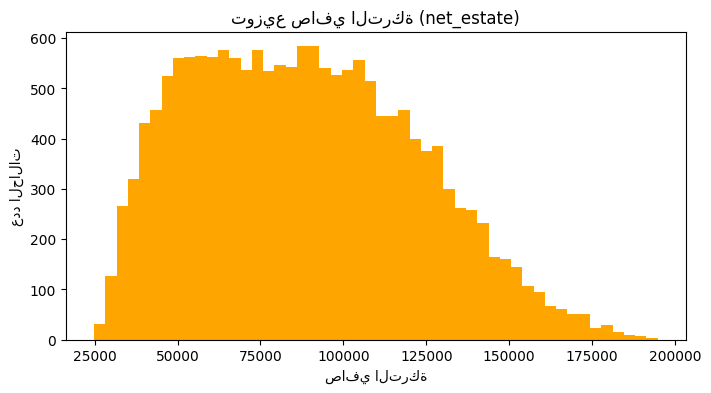

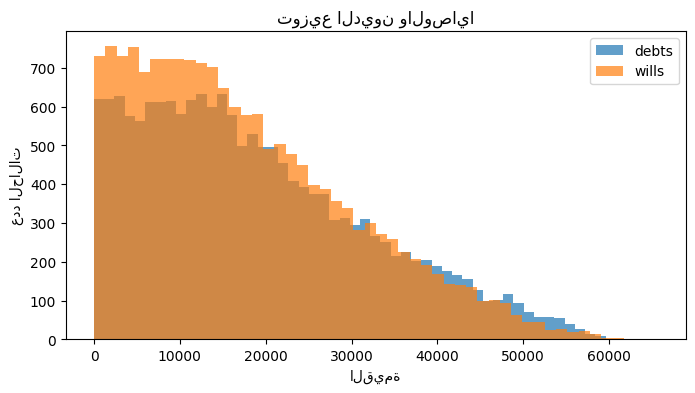

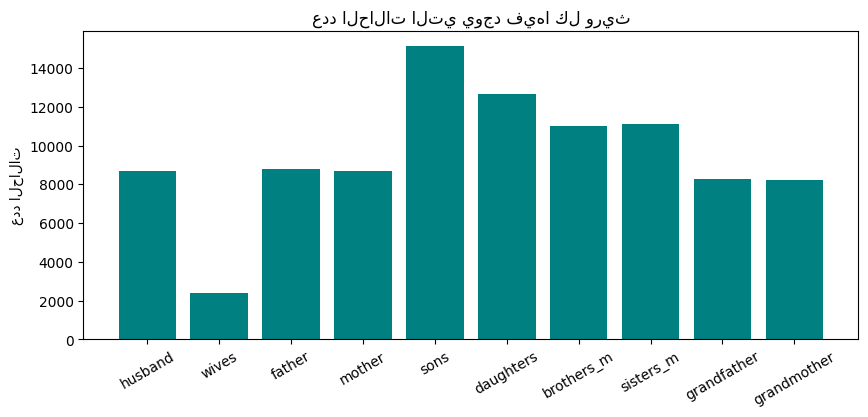

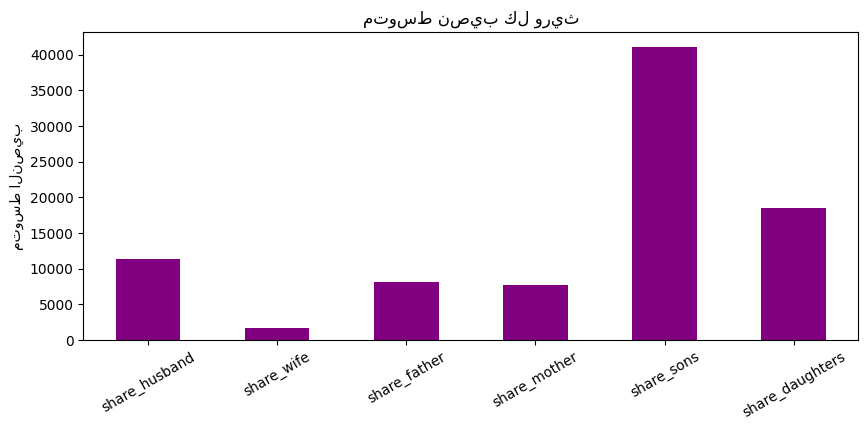

In [59]:

import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/final_inheritanc.csv"
df = pd.read_csv(url)

# تحميل الملف


# حساب صافي التركة
df['net_estate'] = df['estate'] - df['debts'] - df['wills']

# 1. رسم توزيع قيمة التركة (estate)
plt.figure(figsize=(8,4))
df['estate'].hist(bins=50, color='skyblue')
plt.title('توزيع قيمة التركة (estate)')
plt.xlabel('قيمة التركة')
plt.ylabel('عدد الحالات')
plt.grid(False)
plt.show()

# 2. رسم توزيع صافي التركة (net_estate)
plt.figure(figsize=(8,4))
df['net_estate'].hist(bins=50, color='orange')
plt.title('توزيع صافي التركة (net_estate)')
plt.xlabel('صافي التركة')
plt.ylabel('عدد الحالات')
plt.grid(False)
plt.show()

# 3. رسم توزيع الديون (debts) والوصايا (wills)
plt.figure(figsize=(8,4))
df['debts'].hist(bins=50, alpha=0.7, label='debts')
df['wills'].hist(bins=50, alpha=0.7, label='wills')
plt.title('توزيع الديون والوصايا')
plt.xlabel('القيمة')
plt.ylabel('عدد الحالات')
plt.legend()
plt.grid(False)
plt.show()

# 4. رسم نسب وجود الورثة (أعمدة 0/1)
binary_cols = [
    'husband', 'wives', 'father', 'mother', 'sons', 'daughters',
    'brothers_m', 'sisters_m', 'grandfather', 'grandmother'
]
counts = {col: df[col].sum() for col in binary_cols}
plt.figure(figsize=(10,4))
plt.bar(counts.keys(), counts.values(), color='teal')
plt.title('عدد الحالات التي يوجد فيها كل وريث')
plt.ylabel('عدد الحالات')
plt.xticks(rotation=30)
plt.show()

# 5. رسم متوسط نصيب كل وريث (share_*)
share_cols = [c for c in df.columns if c.startswith('share_')]
means = df[share_cols].mean()
plt.figure(figsize=(10,4))
means.plot(kind='bar', color='purple')
plt.title('متوسط نصيب كل وريث')
plt.ylabel('متوسط النصيب')
plt.xticks(rotation=30)
plt.show()

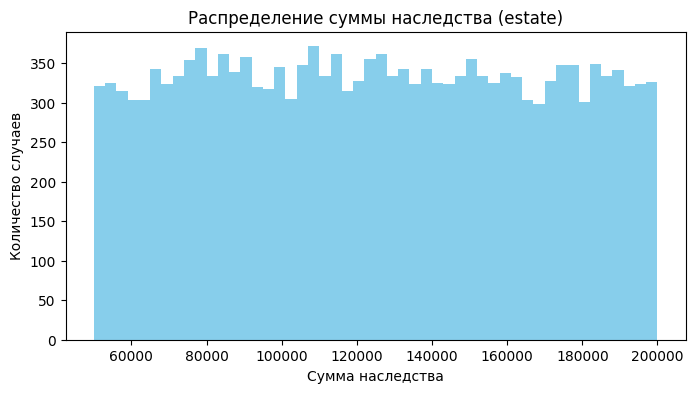

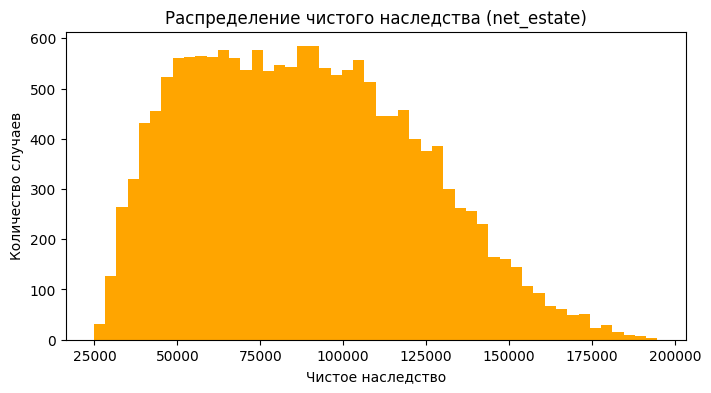

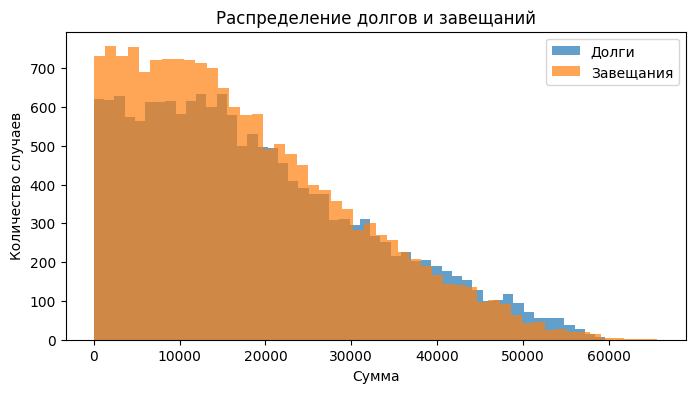

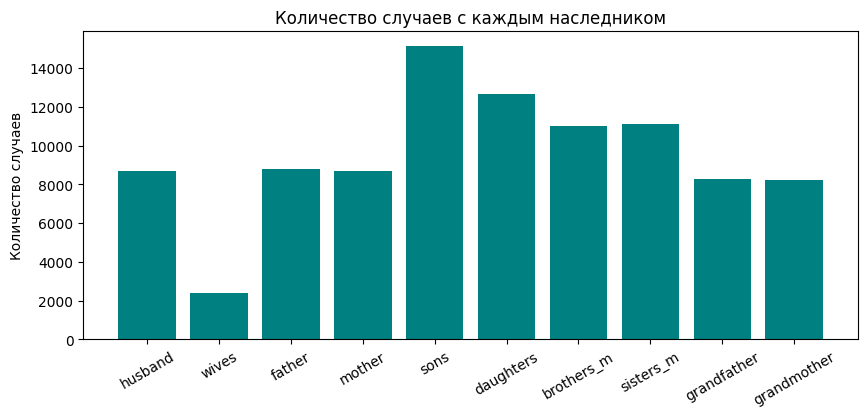

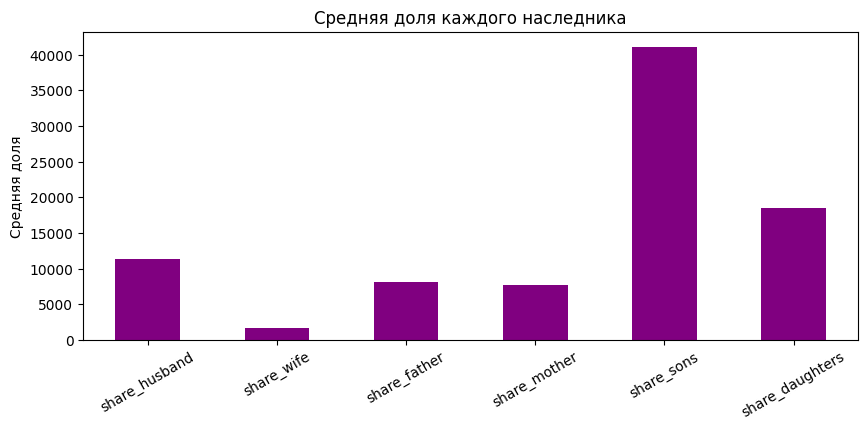

In [60]:

import pandas as pd
import matplotlib.pyplot as plt

# Загрузка файла
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/final_inheritanc.csv"
df = pd.read_csv(url)

# Расчёт чистого наследства
df['net_estate'] = df['estate'] - df['debts'] - df['wills']

# 1. Гистограмма распределения суммы наследства (estate)
plt.figure(figsize=(8,4))
df['estate'].hist(bins=50, color='skyblue')
plt.title('Распределение суммы наследства (estate)')
plt.xlabel('Сумма наследства')
plt.ylabel('Количество случаев')
plt.grid(False)
plt.show()

# 2. Гистограмма распределения чистого наследства (net_estate)
plt.figure(figsize=(8,4))
df['net_estate'].hist(bins=50, color='orange')
plt.title('Распределение чистого наследства (net_estate)')
plt.xlabel('Чистое наследство')
plt.ylabel('Количество случаев')
plt.grid(False)
plt.show()

# 3. Гистограмма распределения долгов (debts) и завещаний (wills)
plt.figure(figsize=(8,4))
df['debts'].hist(bins=50, alpha=0.7, label='Долги')
df['wills'].hist(bins=50, alpha=0.7, label='Завещания')
plt.title('Распределение долгов и завещаний')
plt.xlabel('Сумма')
plt.ylabel('Количество случаев')
plt.legend()
plt.grid(False)
plt.show()

# 4. Гистограмма наличия наследников (столбцы 0/1)
binary_cols = [
    'husband', 'wives', 'father', 'mother', 'sons', 'daughters',
    'brothers_m', 'sisters_m', 'grandfather', 'grandmother'
]
counts = {col: df[col].sum() for col in binary_cols}
plt.figure(figsize=(10,4))
plt.bar(counts.keys(), counts.values(), color='teal')
plt.title('Количество случаев с каждым наследником')
plt.ylabel('Количество случаев')
plt.xticks(rotation=30)
plt.show()

# 5. Гистограмма средних долей каждого наследника (share_*)
share_cols = [c for c in df.columns if c.startswith('share_')]
means = df[share_cols].mean()
plt.figure(figsize=(10,4))
means.plot(kind='bar', color='purple')
plt.title('Средняя доля каждого наследника')
plt.ylabel('Средняя доля')
plt.xticks(rotation=30)
plt.show()